# Chapter 14.  USA.gov data from bit.ly (URL shortening service)

A feed of anonymous data gathered from users who shorten links ending with .gov or .mil.<br/>

.gov (government) - the United States Federal Government; e.g. New York State: http://www.ny.gov <br/>
.mil (military) - the United States Department of Defense; e.g. US Navy: http://www.navy.mil <br/>



Errata url: http://www.oreilly.com/catalog/errata.csp?isbn=0636920023784 <br/>

USA.gov data feeds and APIs - no longer available (http://usa.gov/About/developer-resources/lusagov.shtml)

In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

### bit.ly data is in JSON format
Import json module in order to convert JSON string to Python dictionary for each line of our data feed.

In [2]:
import json

### Read and display the first line of JSON data feed

In [3]:
path = "../data/usagov_bitly_data2012-03-16-1331923249.txt"

file = open(path, 'r')

print (file.readline())
print (file.readline())
print (file.readline())

file.close()

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }

{ "a": "GoogleMaps\/RochesterNY", "c": "US", "nk": 0, "tz": "America\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\/\/www.AwareMap.com\/", "u": "http:\/\/www.monroecounty.gov\/etc\/911\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }

{ "a": "Mozilla\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; Inf

### Create a list of dictionaries with the help of list comprehensions.
For each line of our data feed, load JSON string into Python dictionary and add that dictionary to the list.

In [4]:
records = [json.loads(line) for line in open(path)]

#records is a list of dictionaries
type(records), type(records[0])

(list, dict)

In [5]:
#the first record
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

### Access the first timezone
First list element, dictionary key 'tz'

In [6]:
records[0]['tz']

'America/New_York'

### Create a DataFrame object.
Recall that our JSON data feed was loaded into a list of Python dictionaries, <i>records</i>.

In [7]:
df = DataFrame(records)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [9]:
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


### Display the first ten time zones

In [10]:
df['tz'][0:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

### Display the top ten time zones

In [11]:
tz_counts = df['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

### Replace <i>NA / NaN</i> values with a string 'Missing'.

In [12]:
clean_tz = df['tz'].fillna('Missing')

### Replace empty strings with a string 'Unknown'. 
With the help of boolean array indexing:

In [13]:
clean_tz [clean_tz == ''] = 'Unknown'

### Recalculate the number of time zones.
The new list includes 'Missing' and 'Unknown' time zones.

In [14]:
tz_counts = clean_tz.value_counts()

In [15]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

### Create a horizontal bar plot

<AxesSubplot:>

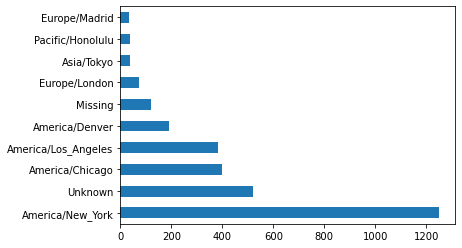

In [16]:
%matplotlib inline
tz_counts[:10].plot(kind="barh")

<AxesSubplot:>

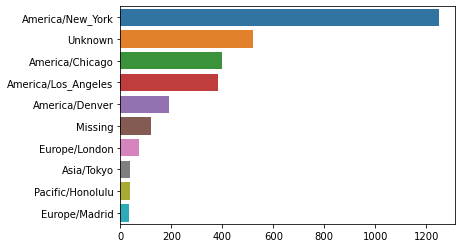

In [17]:
import seaborn as sns
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

## Top application names derived from user agent strings.
### Example values of "agent" strings.  
User agent strings contain information about the browser, device or application used to perform the URL shortening.

In [18]:
df['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [19]:
df['a'][51]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

### Decompose the top time zones into Windows and non-Windows users.
Exclude missing agents from the data.

In [20]:
df.a.notnull().head()

0    True
1    True
2    True
3    True
4    True
Name: a, dtype: bool

In [21]:
clean_df = df[df.a.notnull()]
clean_df['a'][:10]

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

### A user is on Windows if the string 'Windows' is in the agent string.  

Series and Index are equipped with a set of **string processing** methods that make it easy to operate on each element of the array. Perhaps most importantly, these methods exclude missing/NA values automatically. These are accessed via the **str attribute** and generally have names matching the equivalent (scalar) built-in string methods: ***lower(), upper(), len()***
https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [22]:
operating_system = np.where(clean_df['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:100]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Not Windows', 'Windows',
       'Windows', 'Not Windows', 'Windows', 'Windows', 'Windows',
       'Windows', 'Not Windows', 'Not Windows', 'Windows', 'Windows',
       'Not Windows', 'Windows', 'Not Windows', 'Windows', 'Windows',
       'Windows', 'Not Windows', 'Not Windows', 'Not Windows', 'Windows',
       'Windows', 'Windows', 'Not Windows', 'Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Windows', 'Not Windows',
       'Windows', 'Windows', 'Windows', 'Not Windows', 'Not Windows',
       'Not Windows', 'Windows', 'Windows', 'Windows', 'Windows',
       'Not Windows', 'Windows', 'Windows', 'Windows', 'Windows',
       'Not Windows', 'Not Windows', 'Not Windows', 'Windows', 'Windows',
       'Windows', 'Windows', 'Windows', 'Windows', 'Windows', 'Windows',
       'Windows', 'Windows', 'Not Windows', 'Not Windows', 'Windows',
       'Windows', 'Not Windows', 

In [23]:
len(operating_system)

3440

### Group the data by its time zone column and this new list of operating systems

In [24]:
clean_df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [25]:
by_tz_os = clean_df.groupby(['tz', operating_system])
by_tz_os.size()

tz                            
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [26]:
# The group counts are computed using size(), analalogous to the value_counts function.

agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head(10)

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


### Select the top overall time zones.  

To do so, construct an indirect index array from the row counts in agg_counts.  
  
***pandas.Series.sum*** returns the sum of the values for the requested axis  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html

In [27]:
sum_Windows_NotWindows = agg_counts.sum(axis=1)
sum_Windows_NotWindows[:10]

tz
                                  521.0
Africa/Cairo                        3.0
Africa/Casablanca                   1.0
Africa/Ceuta                        2.0
Africa/Johannesburg                 1.0
Africa/Lusaka                       1.0
America/Anchorage                   5.0
America/Argentina/Buenos_Aires      1.0
America/Argentina/Cordoba           1.0
America/Argentina/Mendoza           1.0
dtype: float64

In [28]:
# Use to sort in ascending order
indexer = sum_Windows_NotWindows.argsort()
indexer
#agg_counts.sum(1).index.get_loc('America/New_York')
#sum_Windows_NotWindows[:30]

tz
                       24
Africa/Cairo           20
Africa/Casablanca      21
Africa/Ceuta           92
Africa/Johannesburg    87
                       ..
Europe/Volgograd       15
Europe/Warsaw          22
Europe/Zurich          12
Pacific/Auckland        0
Pacific/Honolulu       29
Length: 97, dtype: int64

### Use take() to select the rows in that order, then slice off the last 10 rows:

In [29]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


### One more horizontal bar plot where stacked = True

<AxesSubplot:ylabel='tz'>

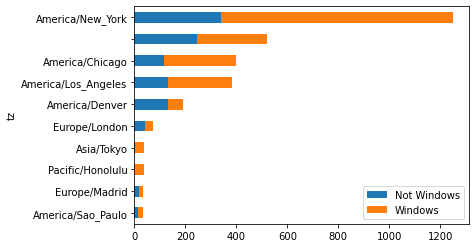

In [30]:
count_subset.plot(kind='barh', stacked=True)

### Percentage Windows and non-Windows users in top-occurring time zones

In [31]:
count_subset[:10]

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [32]:
# axis along which a sum is performed
sumup = count_subset.sum(axis=1)
sumup.head()

tz
America/Sao_Paulo    33.0
Europe/Madrid        35.0
Pacific/Honolulu     36.0
Asia/Tokyo           37.0
Europe/London        74.0
dtype: float64

In [33]:
# along axis 0 (rows)
normed_subset = count_subset.div(sumup, axis=0)
normed_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,0.393939,0.606061
Europe/Madrid,0.457143,0.542857
Pacific/Honolulu,0.000000,1.000000
Asia/Tokyo,0.054054,0.945946
Europe/London,0.581081,0.418919
America/Denver,0.691099,0.308901
America/Los_Angeles,0.340314,0.659686
America/Chicago,0.287500,0.712500
,0.470250,0.529750


<AxesSubplot:ylabel='tz'>

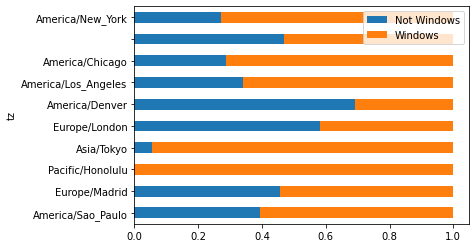

In [34]:
normed_subset.plot(kind='barh', stacked=True)

### numpy.sum() examples
https://numpy.org/doc/stable/reference/generated/numpy.sum.html

In [35]:
import numpy as np
my_array = np.array([[0, 1], [0, 5]])
my_array

array([[0, 1],
       [0, 5]])

In [36]:
# axis along which a sum is performed - the last column
# col1 + col2 = col3
np.sum(my_array, axis=1)

array([1, 5])

In [37]:
# sum is the last row
np.sum(my_array, axis=0)

array([0, 6])